In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [3]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

what are the columns datatypes:

In [4]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


How many rows and columns does the dataset have?: 

In [5]:
gdp_df.shape

(8219, 4)

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [7]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [8]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'country', 'Year':'year', 'Value':'gdp_per_capita'})

In [9]:
gdp_df.columns

Index(['country', 'year', 'gdp_per_capita'], dtype='object')

In [10]:
gdp_df

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


Value Footnotes are dropped and columns are renamed! ^ 

How many countries have data for all years?

In [11]:
gdp_df.country.value_counts()

country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [12]:
gdp_df.year.nunique()

34

In [13]:
gdp_df.year.value_counts()

year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

art.isna().sum()

In [14]:
gdp_df

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


print(df.isnull())

In [15]:
print(gdp_df.isnull())

      country   year  gdp_per_capita
0       False  False           False
1       False  False           False
2       False  False           False
3       False  False           False
4       False  False           False
...       ...    ...             ...
8214    False  False           False
8215    False  False           False
8216    False  False           False
8217    False  False           False
8218    False  False           False

[8219 rows x 3 columns]


In [16]:
gdp_df.isnull().values.any()

False

In [17]:
year_counts = gdp_df.groupby('country')['year'].nunique()
year_counts

country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: year, Length: 247, dtype: int64

In [18]:
year_total = gdp_df.year.nunique()
year_total

34

In [19]:
countries_all_years = year_counts.loc[year_counts == year_total]
countries_all_years

country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: year, Length: 228, dtype: int64

In [20]:
countries_missing_years = year_counts.loc[year_counts != year_total]
countries_missing_years

country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: year, dtype: int64

In [21]:
gdp_df.year.value_counts()

year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [22]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
gdp_df     DataFrame              country  year  <...>\n[8219 rows x 3 columns]


In [23]:
gdp_2020 = gdp_df.loc[gdp_df.year == 2020]
gdp_2020

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


Histogram chart:

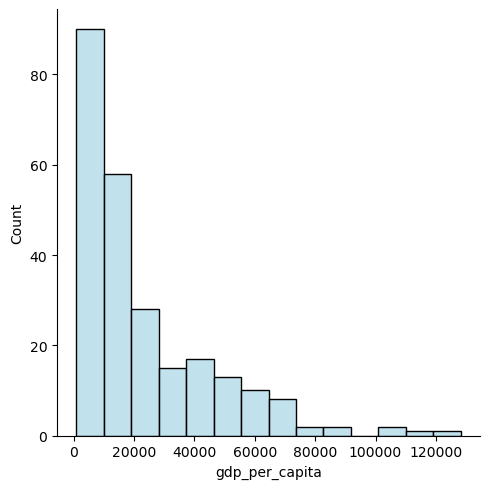

In [24]:
sns.displot(gdp_2020['gdp_per_capita'],color = 'lightblue');

Density chart:

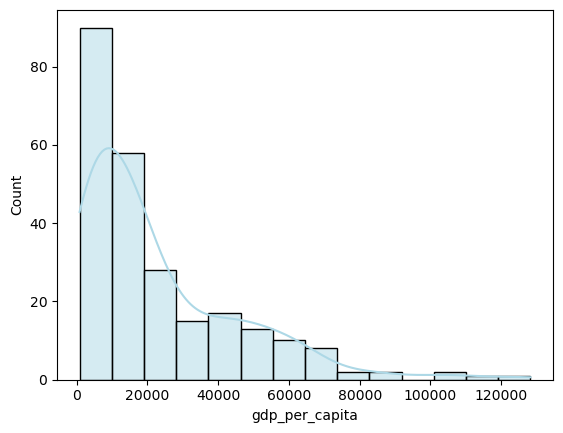

In [25]:
sns.histplot(gdp_2020['gdp_per_capita'], kde=True, color = 'lightblue')
plt.show()

Boxplot chart:

<Axes: ylabel='gdp_per_capita'>

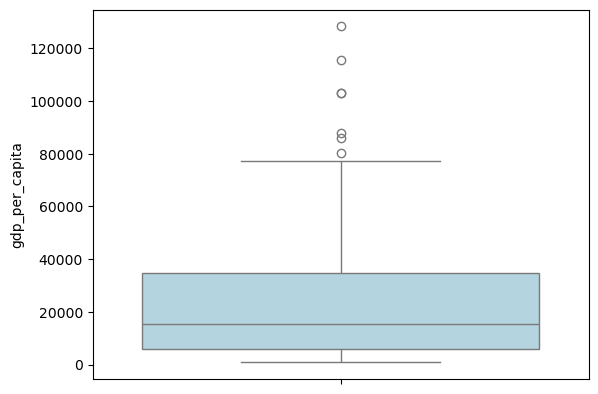

In [26]:
sns.boxplot(gdp_2020['gdp_per_capita'], color = 'lightblue')

Violin plot:

<Axes: ylabel='gdp_per_capita'>

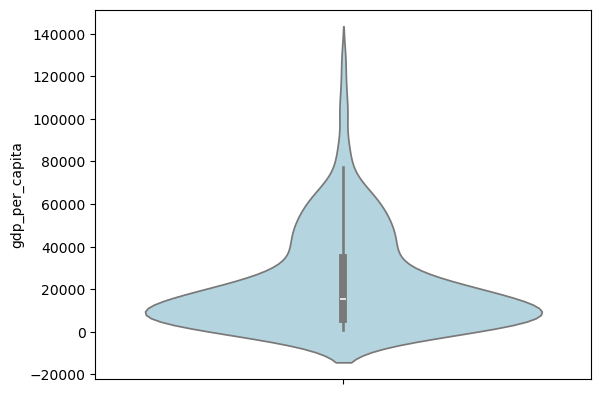

In [27]:
sns.violinplot(gdp_2020['gdp_per_capita'], color = 'lightblue')

In [28]:
gdp_2020.describe()

,year,gdp_per_capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


### 9) What was the median GDP per capita value in 2020? : 

In [29]:
gdp_2020.gdp_per_capita.median()

15309.23598817024

In [30]:
gdp_decades = gdp_df[gdp_df.year.isin([1990, 2000, 2010, 2020])]

In [31]:
gdp_decades

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


Box plot of decades:

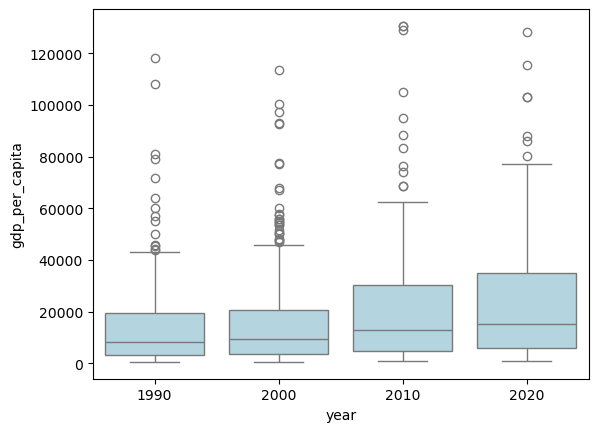

In [32]:
sns.boxplot(x = gdp_decades['year'], y = gdp_decades['gdp_per_capita'], color = 'lightblue');

Barplot of decades:

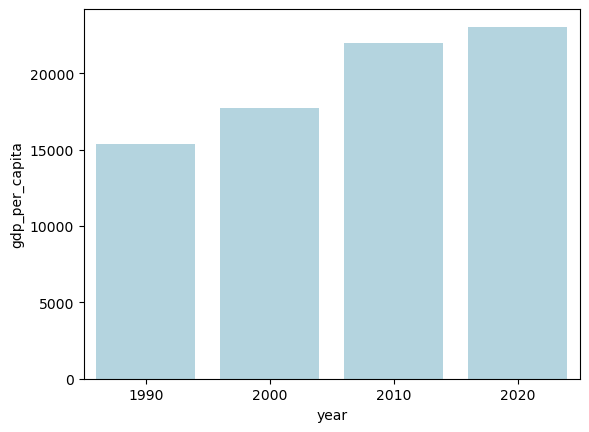

In [33]:
sns.barplot(x="year", y="gdp_per_capita", data=gdp_decades, errorbar=None, color='lightblue');

Scatterplot chart:

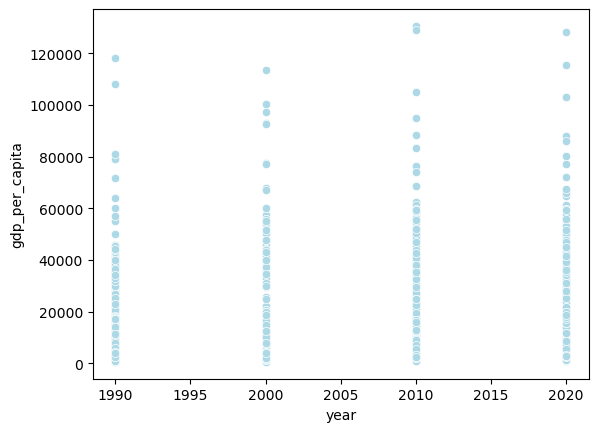

In [34]:
sns.scatterplot(x="year", y="gdp_per_capita", data=gdp_decades,color = 'lightblue');

Scatterplot with a trend line: 

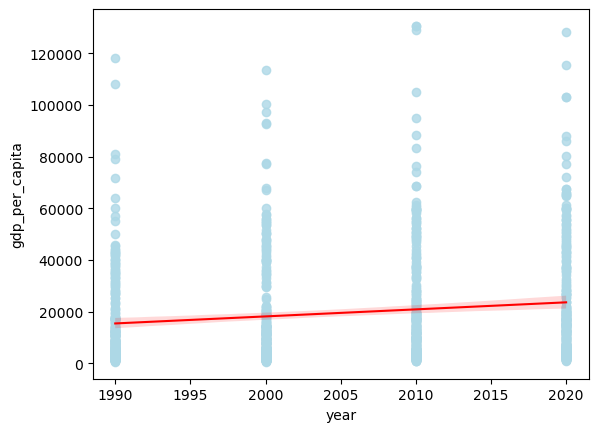

In [35]:
sns.regplot(x="year", y="gdp_per_capita", data=gdp_decades, line_kws={"color": "red", "linewidth": 1.5}, color = 'lightblue');

Median per decades df:

In [36]:
gdp_decades.gdp_per_capita.median()

11632.17445347484

### 11.Which country was the first to have a GDP per capita greater than $100,000?



In [37]:
gdp_more_than_100k = gdp_df.gdp_per_capita > 100000

In [38]:
first_country_over_100k = gdp_df[gdp_more_than_100k].groupby('year').first()
print(first_country_over_100k)

         country  gdp_per_capita
year                            
1990      Brunei   118163.683198
1991      Brunei   118220.683619
1992      Brunei   111457.220910
1993      Brunei   107899.136177
1994      Brunei   106239.232214
1995      Brunei   105043.852684
1996      Brunei   102522.125236
1997      Brunei   106503.420292
1998  Luxembourg   100738.594873
1999  Luxembourg   107512.224551
2000      Brunei   100323.440022
2001     Bermuda   103724.861800
2002     Bermuda   101739.790229
2003     Bermuda   104798.346290
2004     Bermuda   106941.298273
2005     Bermuda   108461.234809
2006     Bermuda   114250.093078
2007     Bermuda   117742.118950
2008     Bermuda   115015.749469
2009     Bermuda   108091.644563
2010     Bermuda   105121.639689
2011     Bermuda   101174.504104
2012  Luxembourg   128099.279571
2013  Luxembourg   129142.843309
2014  Luxembourg   129443.183641
2015  Luxembourg   129293.707435
2016  Luxembourg   132836.085831
2017  Luxembourg   131353.485059
2018  Luxe

In [39]:
gdp_1990 = gdp_df.loc[gdp_df.year == 1990]

In [40]:
gdp_1990.loc[gdp_1990.gdp_per_capita > 100000] ## first country is in 1990, checking what other countries they are:

,country,year,gdp_per_capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


In [41]:
gdp_2020

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [42]:
gdp_2020.groupby(['country'])['gdp_per_capita'].max() #doesn't show the highest country

country
Afghanistan                     2769.685745
Africa Eastern and Southern     3861.111238
Africa Western and Central      4622.731427
Albania                        14650.395929
Algeria                        14194.155748
                                   ...     
Virgin Islands                 45055.782930
West Bank and Gaza              5423.682547
World                          18600.986362
Zambia                          3391.595412
Zimbabwe                        2987.269823
Name: gdp_per_capita, Length: 247, dtype: float64

### 12). Found the country name that had highest GDP per capita in 2020:

In [43]:
gdp_2020.loc[gdp_2020['gdp_per_capita'].idxmax()]

country              Luxembourg
year                       2020
gdp_per_capita    128256.560341
Name: 4426, dtype: object

In [44]:
luxembourg = gdp_df.loc[gdp_df.country == 'Luxembourg']

### 12) Create a plot showing how this country's GDP per capita has changed over timespan of the dataset: 

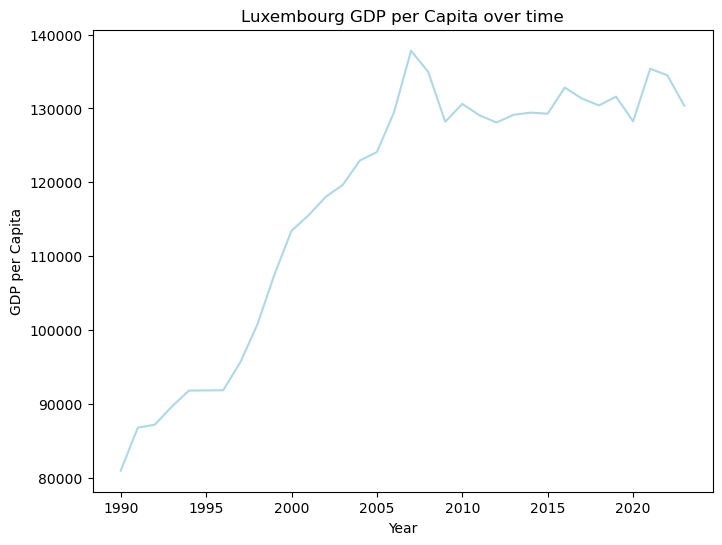

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(luxembourg['year'], luxembourg['gdp_per_capita'], color = 'lightblue')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per Capita')
ax.set_title('Luxembourg GDP per Capita over time');

### 13) Which country had the lowest GDP per capita in 2020?

In [46]:
gdp_2020.loc[gdp_2020['gdp_per_capita'].idxmin()]

country              Burundi
year                    2020
gdp_per_capita    833.920257
Name: 1046, dtype: object

In [47]:
gdp_2020.sort_values(by = 'gdp_per_capita', ascending = True)  #other way of checking min capita in that year

,country,year,gdp_per_capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [48]:
burundi = gdp_df.loc[gdp_df.country == 'Burundi']
burundi.head()

,country,year,gdp_per_capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


### 13) Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

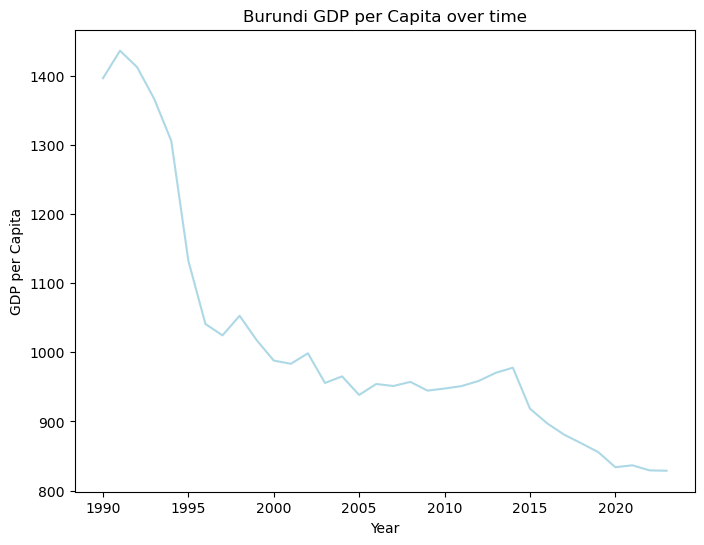

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(burundi['year'], burundi['gdp_per_capita'], color = 'lightblue')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per Capita')
ax.set_title('Burundi GDP per Capita over time');

### 13) BONUS: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?

In [50]:
gdp_2020.gdp_per_capita.mean()  ##in 2020 average gdp per capita was 23044

23044.942555569738

In [51]:
gdp_1990 = gdp_df.loc[gdp_df.year == 1990]
gdp_1990.gdp_per_capita.mean()  ##in 1990 average gdp per capita was 15378 so it is true, gdp per capita in 2020 was higher.

15378.121745139617

In [52]:
gdp_2020

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [53]:
gdp_1990

,country,year,gdp_per_capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776
...,...,...,...
8031,Vanuatu,1990,3101.680551
8065,Viet Nam,1990,2467.964601
8150,World,1990,11207.386344
8184,Zambia,1990,2425.111287


### 13) BONUS: Last part of the question: Which countries had lower GDPpc in 2020 than in 1990:

In [54]:
gdp_1990_2020 = pd.merge (gdp_1990, gdp_2020, on = "country", how = "inner") ## merging 2 tables

In [55]:
gdp_1990_2020.head()

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y
0,Africa Eastern and Southern,1990,3386.854480,2020,3861.111238
1,Africa Western and Central,1990,3299.401375,2020,4622.731427
2,Albania,1990,5327.747458,2020,14650.395929
3,Algeria,1990,11728.545729,2020,14194.155748
4,Andorra,1990,50036.300776,2020,55488.490299


### Changing column names:

In [56]:
gdp_1990_2020 = gdp_1990_2020.rename(columns = {'year_x': 'year_1990', 'gdp_per_capita_x': 'gdp_per_capita_1990', 'year_y': 'year_2020', 'gdp_per_capita_y':'gdp_per_capita_2020'})

In [57]:
gdp_1990_2020

,country,year_1990,gdp_per_capita_1990,year_2020,gdp_per_capita_2020
0,Africa Eastern and Southern,1990,3386.854480,2020,3861.111238
1,Africa Western and Central,1990,3299.401375,2020,4622.731427
2,Albania,1990,5327.747458,2020,14650.395929
3,Algeria,1990,11728.545729,2020,14194.155748
4,Andorra,1990,50036.300776,2020,55488.490299
...,...,...,...,...,...
228,Vanuatu,1990,3101.680551,2020,3259.995437
229,Viet Nam,1990,2467.964601,2020,11851.396569
230,World,1990,11207.386344,2020,18600.986362
231,Zambia,1990,2425.111287,2020,3391.595412


### Asking the question, which countries had higher GDP per capita in 1990 than 2020?

In [58]:
gdp_2020_lower_than_1990 = gdp_1990_2020.loc[gdp_1990_2020.gdp_per_capita_1990 > gdp_1990_2020.gdp_per_capita_2020]
gdp_2020_lower_than_1990

,country,year_1990,gdp_per_capita_1990,year_2020,gdp_per_capita_2020
10,Aruba,1990,34579.220640,2020,28521.688852
16,Barbados,1990,16976.761648,2020,15749.038017
27,Brunei,1990,118163.683198,2020,80280.897948
30,Burundi,1990,1396.077627,2020,833.920257
37,Central African Republic,1990,1481.252551,2020,1136.570530
44,Congo,1990,8699.526839,2020,6350.509134
49,Dem. Rep. Congo,1990,2172.001597,2020,1277.632863
71,Fragile and conflict affected situations,1990,6062.707946,2020,5271.014406
73,Gabon,1990,23884.810700,2020,18681.484074
84,Haiti,1990,3946.365646,2020,3229.475544


In [59]:
gdp_2020_lower_than_1990.shape  ## double checking the number of countries

(24, 5)

In [60]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df    ## Question 14

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [61]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])  #15)dropping column

In [62]:
internet_df = internet_df.rename(columns = {'Country or Area':'country', 'Year':'year', 'Value': 'internet_users_pct'}) ##15)renaming columns

In [63]:
internet_df

,country,year,internet_users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### 16 ) Look at the number of observations in this dataset per year. What do you notice?

In [64]:
count_per_year = internet_df.year.value_counts()

In [65]:
count_per_year = count_per_year.reset_index()

In [66]:
count_per_year

,year,count
0,1990,226
1,2007,217
2,2011,214
3,2008,214
4,2009,214
5,2002,214
6,2006,212
7,2001,212
8,2005,212
9,2004,210


In [67]:
count_per_year = count_per_year.reset_index(drop = True)  #resetting index again
count_per_year

,year,count
0,1990,226
1,2007,217
2,2011,214
3,2008,214
4,2009,214
5,2002,214
6,2006,212
7,2001,212
8,2005,212
9,2004,210


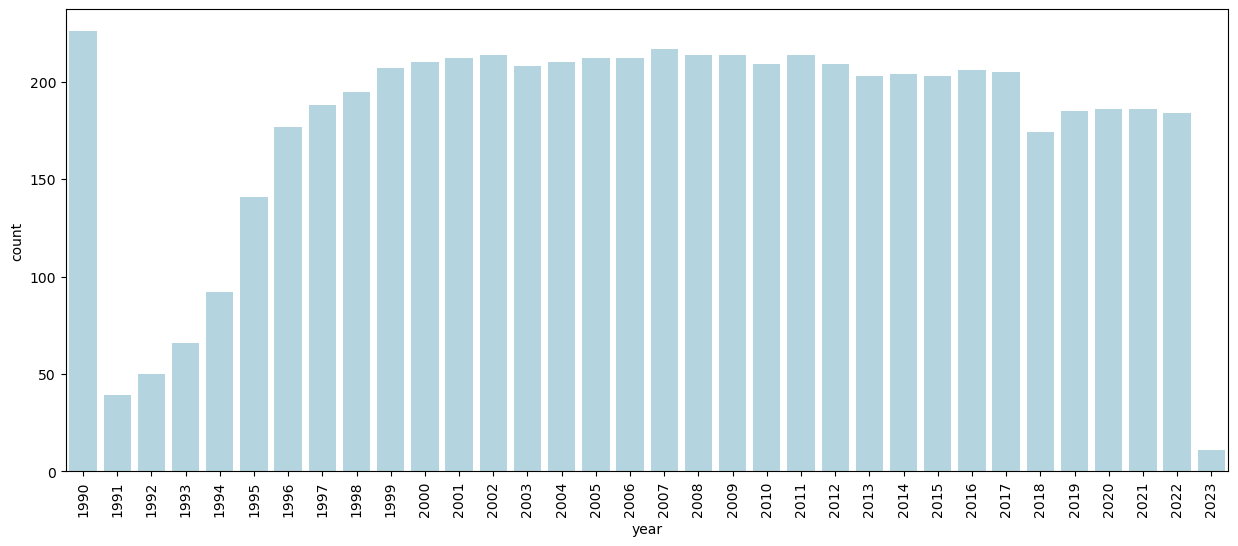

In [68]:
plt.figure(figsize =(15,6))
sns.barplot(x="year", y="count", data= count_per_year, errorbar=None, color='lightblue')
plt.xticks(rotation=90);                                ## Question 16 - decided to make a plot to show the numbers

### 17) What is the first year to have a non-zero internet users percentage value?

In [69]:
internet_df

,country,year,internet_users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [70]:
more_than_zero = internet_df.loc[internet_df.internet_users_pct >= 1]

In [71]:
more_than_zero.groupby('year').min()  #the year is 1991 if non-zero is >=1 

,country,internet_users_pct
year,,
1991,Australia,1.09720
1992,Australia,1.32001
1993,Australia,1.18456
1994,Australia,1.03661
1995,Antigua and Barbuda,1.01708
1996,Andorra,1.02329
1997,Andorra,1.00309
1998,Andorra,1.00286
1999,Andorra,1.01797


18.How does the distribution of internet users percent differ for 2000 and 2014?

In [72]:
internet_2000 = internet_df.loc[internet_df.year == 2000]

In [73]:
internet_2014 = internet_df.loc[internet_df.year == 2014]

In [74]:
internet_2000.describe() #in 2000 the average percentage of internet users across all countries is 9.33% with max being 58%

,year,internet_users_pct
count,210.0,210.000000
mean,2000.0,9.332385
std,0.0,13.644205
min,2000.0,0.000000
25%,2000.0,0.482059
50%,2000.0,2.886680
75%,2000.0,10.539025
max,2000.0,58.620700


In [75]:
internet_2014.describe()  #in 2014 the average percentage of internet users across all countries is 45% with max being 98%

,year,internet_users_pct
count,204.0,204.000000
mean,2014.0,45.604925
std,0.0,29.295667
min,2014.0,0.990000
25%,2014.0,17.403300
50%,2014.0,46.818000
75%,2014.0,70.262500
max,2014.0,98.158000


### 19) For how many countries was the percentage of internet users below 5% in 2014?

In [76]:
internet_2014

,country,year,internet_users_pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [77]:
below_5pct_2014 = internet_2014.loc[internet_2014.internet_users_pct < 5]

In [78]:
below_5pct_2014 # for 10 countries percentage of internet users was below 5%

,country,year,internet_users_pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [79]:
below_5pct_2014 .shape  # if we wanna see the actual number count

(10, 3)

### 20) merge two dataframes to one. Do this in a way that keeps ALL ROWS from each of the two dataframes.

In [80]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df, 
                                on = ['country','year'], how = 'outer') #this doesn't keep all the rows

In [81]:
gdp_and_internet_use

,country,year,internet_users_pct,gdp_per_capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2000,NaN,1617.826475
2,Afghanistan,2001,0.004723,1454.110782
3,Afghanistan,2002,0.004561,1774.308743
4,Afghanistan,2003,0.087891,1815.928200
...,...,...,...,...
9494,Zimbabwe,2019,26.588300,3294.806084
9495,Zimbabwe,2020,29.298600,2987.269823
9496,Zimbabwe,2021,32.461600,3184.785451
9497,Zimbabwe,2022,32.561500,3323.121932


### 21)Find the three countries with the highest internet users percentage in 2014.

In [82]:
gdp_and_internet_use.loc[gdp_and_internet_use.year == 2014].sort_values("internet_users_pct", ascending = False)

,country,year,internet_users_pct,gdp_per_capita
3944,Iceland,2014,98.1580,57981.199448
2867,Falkland (Malvinas) Islands,2014,97.6000,NaN
824,Bermuda,2014,96.8000,92298.387811
6467,Norway,2014,96.3005,84753.668395
2168,Denmark,2014,95.9935,60992.212220
...,...,...,...,...
8867,TÃ¼rkiye,2014,NaN,24573.488878
9103,Upper middle income,2014,NaN,15312.435710
9292,Virgin Islands,2014,NaN,42853.898660
9361,West Bank and Gaza,2014,NaN,5990.426615


In [83]:
three_top_2014 = gdp_df.loc[gdp_df.country.isin(['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda'])]

In [84]:
three_top_2014

,country,year,gdp_per_capita
738,Bermuda,2023,98041.688721
739,Bermuda,2022,98057.447098
740,Bermuda,2021,92276.234605
741,Bermuda,2020,87894.401174
742,Bermuda,2019,94755.432811
...,...,...,...
3213,Iceland,1994,38856.472813
3214,Iceland,1993,37829.544274
3215,Iceland,1992,37720.719265
3216,Iceland,1991,39531.470666


21) use seaborn FacetGrid for these three countries:

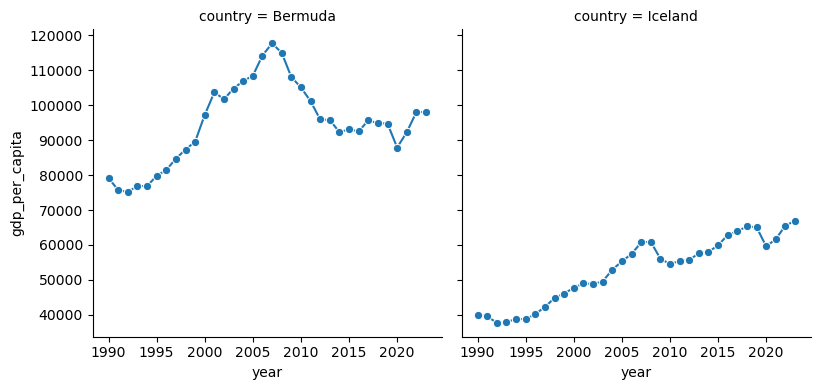

In [85]:
g = sns.FacetGrid(three_top_2014, col="country", col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x="year", y="gdp_per_capita", marker="o")

In [86]:
print(three_top_2014)


      country  year  gdp_per_capita
738   Bermuda  2023    98041.688721
739   Bermuda  2022    98057.447098
740   Bermuda  2021    92276.234605
741   Bermuda  2020    87894.401174
742   Bermuda  2019    94755.432811
...       ...   ...             ...
3213  Iceland  1994    38856.472813
3214  Iceland  1993    37829.544274
3215  Iceland  1992    37720.719265
3216  Iceland  1991    39531.470666
3217  Iceland  1990    40081.958967

[68 rows x 3 columns]


In [87]:
print(gdp_df.country.unique())  ## looks like gdp_df doesn't have Falkland Island in it's dataset

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Arab World'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' "CÃ´te d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states'
 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'CuraÃ§ao' 'Cyprus' 'Czechia'
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Euro area'
 'Europe & Centr

### 22) Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [88]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.year == 2014]

In [89]:
gdp_and_internet_use_2014

,country,year,internet_users_pct,gdp_per_capita
15,Afghanistan,2014,7.0000,3017.942544
49,Africa Eastern and Southern,2014,NaN,4052.851526
83,Africa Western and Central,2014,NaN,4816.917355
117,Albania,2014,54.3000,12788.747231
151,Algeria,2014,29.5000,15073.762940
...,...,...,...,...
9361,West Bank and Gaza,2014,NaN,5990.426615
9395,World,2014,NaN,17307.606891
9424,Yemen,2014,22.5500,NaN
9455,Zambia,2014,6.5000,3585.577485


### 23) Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 
### What do you notice from this plot? If you see any unusual points, investigate them.

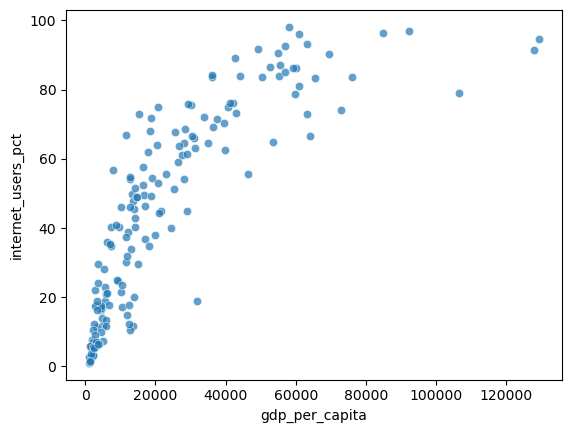

In [90]:
sns.scatterplot(data= gdp_and_internet_use_2014, x="gdp_per_capita", y="internet_users_pct",
            alpha=0.7);

unusual points are over 120k gdp per capita and around 90% internet use

In [91]:
gdp_and_internet_use_2014.sort_values("gdp_per_capita" , ascending = False).head(10) # here we can see which countries (except China
#since we don't have internet pct on it) are the countries far up from the right. They look legit - also have the highest gdp that year.

,country,year,internet_users_pct,gdp_per_capita
5234,"Macao SAR, China",2014,NaN,162582.374111
5200,Luxembourg,2014,94.6702,129443.183641
7045,Qatar,2014,91.4900,128013.987046
7566,Singapore,2014,79.0292,106604.492771
824,Bermuda,2014,96.8000,92298.387811
6467,Norway,2014,96.3005,84753.668395
1064,Brunei,2014,NaN,83310.615064
8343,Switzerland,2014,83.6173,76064.229413
1388,Cayman Islands,2014,74.1000,73017.594917
9001,United Arab Emirates,2014,90.4000,69409.037043


In [92]:
gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014.gdp_per_capita > 30000) & (gdp_and_internet_use_2014.internet_users_pct < 25)] 
## investigation of the one point that was unusual.

,country,year,internet_users_pct,gdp_per_capita
2538,Equatorial Guinea,2014,18.86,31765.899706


### 24) Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. 
### Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [93]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.gdp_per_capita, q = 3, labels= ['Low', 'Medium', 'High'])

C:\Users\Kala\AppData\Local\Temp\ipykernel_7776\2065476561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.gdp_per_capita, q = 3, labels= ['Low', 'Medium', 'High'])


In [94]:
gdp_and_internet_use_2014

,country,year,internet_users_pct,gdp_per_capita,GDP_group
15,Afghanistan,2014,7.0000,3017.942544,Low
49,Africa Eastern and Southern,2014,NaN,4052.851526,Low
83,Africa Western and Central,2014,NaN,4816.917355,Low
117,Albania,2014,54.3000,12788.747231,Medium
151,Algeria,2014,29.5000,15073.762940,Medium
...,...,...,...,...,...
9361,West Bank and Gaza,2014,NaN,5990.426615,Low
9395,World,2014,NaN,17307.606891,Medium
9424,Yemen,2014,22.5500,NaN,NaN
9455,Zambia,2014,6.5000,3585.577485,Low


### 25) Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [95]:
gdp_and_internet_use_2014.groupby('GDP_group', observed = True)['internet_users_pct'].median() #observed True is to get rid of error

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: internet_users_pct, dtype: float64

In [99]:
telephone = pd.read_csv('../data/telephones.csv')

In [100]:
telephone

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2022,0.443052,NaN
1,Afghanistan,2021,0.363563,NaN
2,Afghanistan,2020,0.374079,NaN
3,Afghanistan,2019,0.356468,NaN
4,Afghanistan,2018,0.348338,NaN
...,...,...,...,...
7206,Zimbabwe,1990,1.222720,NaN
7207,footnoteSeqID,Footnote,NaN,NaN
7208,1,ITU estimate,NaN,NaN
7209,2,Provisional.,NaN,NaN


In [104]:
telephone = telephone.rename(columns = {'Country or Area': 'country', 'Year':'year'})
telephone

,country,year,Value,Value Footnotes
0,Afghanistan,2022,0.443052,NaN
1,Afghanistan,2021,0.363563,NaN
2,Afghanistan,2020,0.374079,NaN
3,Afghanistan,2019,0.356468,NaN
4,Afghanistan,2018,0.348338,NaN
...,...,...,...,...
7206,Zimbabwe,1990,1.222720,NaN
7207,footnoteSeqID,Footnote,NaN,NaN
7208,1,ITU estimate,NaN,NaN
7209,2,Provisional.,NaN,NaN


In [101]:
gdp_and_internet_use

,country,year,internet_users_pct,gdp_per_capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2000,NaN,1617.826475
2,Afghanistan,2001,0.004723,1454.110782
3,Afghanistan,2002,0.004561,1774.308743
4,Afghanistan,2003,0.087891,1815.928200
...,...,...,...,...
9494,Zimbabwe,2019,26.588300,3294.806084
9495,Zimbabwe,2020,29.298600,2987.269823
9496,Zimbabwe,2021,32.461600,3184.785451
9497,Zimbabwe,2022,32.561500,3323.121932


In [121]:
telephone = telephone.sort_values(by = 'year', ascending = True)

In [125]:
telephone.drop(index=telephone.index[4818:], inplace=True)
telephone

,country,year,Value,Value Footnotes
3033,Hungary,1990,9.597530,NaN
2967,Haiti,1990,0.649789,NaN
1240,Cayman Islands,1990,47.372100,NaN
4970,Norway,1990,50.270500,NaN
1303,Chad,1990,0.069091,NaN
...,...,...,...,...
957,Brunei Darussalam,2011,19.884900,NaN
1950,Dominican Republic,2011,11.104800,NaN
4018,Maldives,2011,6.432010,NaN
6248,Sweden,2011,47.343600,NaN


In [130]:
telephone['year'] = telephone['year'].astype(int)

In [131]:
telephone.dtypes

country             object
year                 int32
Value              float64
Value Footnotes    float64
dtype: object

In [132]:
gdp_and_internet_use.dtypes

country                object
year                    int64
internet_users_pct    float64
gdp_per_capita        float64
dtype: object

In [135]:
gdp_internet_phone = pd.merge(telephone, gdp_and_internet_use, on = ['country', 'year'], how = 'inner')
gdp_internet_phone

,country,year,Value,Value Footnotes,internet_users_pct,gdp_per_capita
0,Hungary,1990,9.597530,NaN,0.000000,21249.398312
1,Haiti,1990,0.649789,NaN,0.000000,3946.365646
2,Cayman Islands,1990,47.372100,NaN,0.000000,NaN
3,Norway,1990,50.270500,NaN,0.707299,57055.326086
4,Chad,1990,0.069091,NaN,0.000000,1237.942317
...,...,...,...,...,...,...
4391,Brunei Darussalam,2011,19.884900,NaN,56.000000,NaN
4392,Dominican Republic,2011,11.104800,NaN,38.000000,15125.838515
4393,Maldives,2011,6.432010,NaN,34.000000,17473.715718
4394,Sweden,2011,47.343600,NaN,92.770000,56802.506807


In [138]:
gdp_internet_phone = gdp_internet_phone.drop(columns = 'Value Footnotes')